Develop a k-means clustering model to segment physicians based on their prescription behavior, specifically their ratio of new prescriptions (NRx) to total prescriptions (TRx). This segmentation will enable strategic targeting of physician groups with high NRx/TRx ratios to boost sales of a specific drug.


In [ ]:
# importing the necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, sklearn

In [ ]:
# loading the data
df = pd.read_csv('customers.csv')

# check
df

,Unnamed: 0,trx,nrx,Phyisican_Id
0,0,40,8,55232
1,1,37,6,1173
2,2,43,10,28285
3,3,42,9,26262
4,4,46,11,76343
...,...,...,...,...
365,365,42,8,70334
366,366,39,11,57248
367,367,39,6,55229
368,368,35,7,47189


In [ ]:
# storing all the physician Ids into a separate dataframe
phy_id = df['Phyisican_Id'].copy()

# check
phy_id

0      55232
1       1173
2      28285
3      26262
4      76343
       ...  
365    70334
366    57248
367    55229
368    47189
369    11220
Name: Phyisican_Id, Length: 370, dtype: object

In [ ]:
#dropping the id column in df
df.drop('Phyisican_Id',axis=1,inplace=True)

# check
df

,Unnamed: 0,trx,nrx
0,0,40,8
1,1,37,6
2,2,43,10
3,3,42,9
4,4,46,11
...,...,...,...
365,365,42,8
366,366,39,11
367,367,39,6
368,368,35,7


In [ ]:
phy_id

0      55232
1       1173
2      28285
3      26262
4      76343
       ...  
365    70334
366    57248
367    55229
368    47189
369    11220
Name: Phyisican_Id, Length: 370, dtype: object

Let's perform K Means clustering

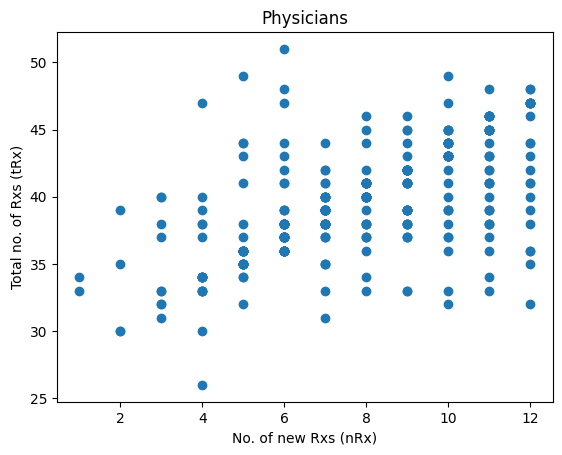

In [ ]:
# visualizing the data

plt.title('Physicians')
plt.scatter(x = df['nrx'], y = df['trx'])
plt.xlabel('No. of new Rxs (nRx)')
plt.ylabel('Total no. of Rxs (tRx)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

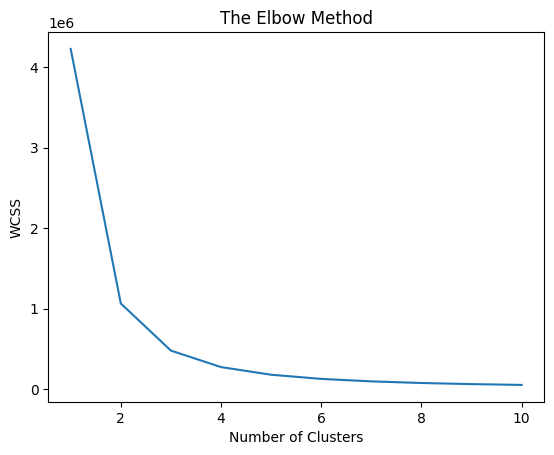

In [ ]:
#Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=100)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


From the elbow curve, we consider optimal number of clusters as 3.

In [ ]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=100)
physicians_clusters=kmeans.fit_predict(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
physicians_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
# adding result to the main dataframe
df['cluster'] = physicians_clusters

# check
df

,Unnamed: 0,trx,nrx,cluster
0,0,40,8,1
1,1,37,6,1
2,2,43,10,1
3,3,42,9,1
4,4,46,11,1
...,...,...,...,...
365,365,42,8,2
366,366,39,11,2
367,367,39,6,2
368,368,35,7,2


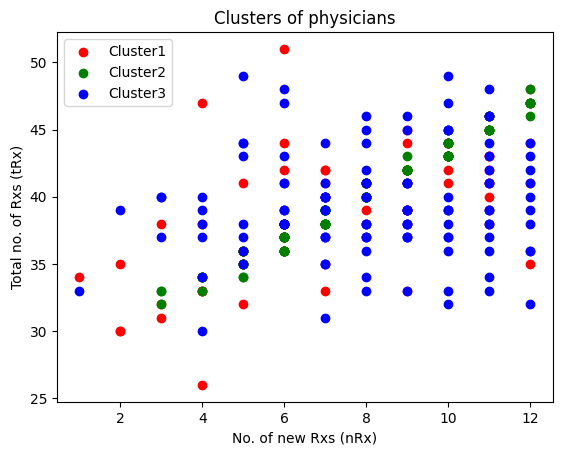

In [ ]:
#Visualize the clusters
plt.scatter(x = df[df['cluster'] == 0]['nrx'], y = df[df['cluster'] == 0]['trx'], c = 'red', label='Cluster1')
plt.scatter(x = df[df['cluster'] == 1]['nrx'], y = df[df['cluster'] == 1]['trx'], c = 'green', label='Cluster2')
plt.scatter(x = df[df['cluster'] == 2]['nrx'], y = df[df['cluster'] == 2]['trx'], c = 'blue', label='Cluster3')


plt.title('Clusters of physicians')
plt.xlabel('No. of new Rxs (nRx)')
plt.ylabel('Total no. of Rxs (tRx)')
plt.legend()
plt.show()

In [ ]:
# adding the physician ids
df['Phyisican_Id'] = phy_id.values

# check
df

,Unnamed: 0,trx,nrx,cluster,Phyisican_Id
0,0,40,8,1,55232
1,1,37,6,1,1173
2,2,43,10,1,28285
3,3,42,9,1,26262
4,4,46,11,1,76343
...,...,...,...,...,...
365,365,42,8,2,70334
366,366,39,11,2,57248
367,367,39,6,2,55229
368,368,35,7,2,47189


In [ ]:
# value counts
df['cluster'].value_counts()

cluster
1    125
0    123
2    122
Name: count, dtype: int64

In [ ]:
df[df['cluster'] == 2]['nrx'].mean()

8.10655737704918

In [ ]:
for c in [0,1,2]:
    # computing nrx to trx ratio for each cluster
    print(f'Nrx to Trx ratio for cluster {c+1}: ',round(df[df['cluster']==c]['nrx'].sum()/df[df['cluster']==c]['trx'].sum(),3))

Nrx to Trx ratio for cluster 1:  0.19
Nrx to Trx ratio for cluster 2:  0.194
Nrx to Trx ratio for cluster 3:  0.206


Therefore, cluster 2 is the group pharma company have to target.

In [ ]:
# saving the results
df.to_csv('customers_clusters.csv')